<a href="https://colab.research.google.com/github/phice421/Visualiza-o_dados_I/blob/main/Visualiza%C3%A7%C3%A3o_de_Dados_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ciência de Dados**


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Gerar gráficos é uma tarefa extremamente importante para a análise de dados, podemos usá-los para obter informações relevantes sobre os nossos dados que refletem algum processo específico. Além disso, os gráficos também podem ser necessários para obtermos informações sobre valores discrepantes em um processo.

Nas seções a seguir iremos explorar alguns tipos de gráficos que existem e verificaremos quais as informações que podemos extrair de cada um deles.

# Recebendo os dados

Para a tarefa da aula de visualização de dados iremos carregar um conjunto de dados chamado `Fish.csv`. Nele temos algumas espécies de peixes e algumas medidas corporais dos mesmos.

In [11]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1w_LHa5IuDl3UZ6uLfXxFc-KNC8NmqP2z'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = '/dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
peixes = pd.read_csv("/dados.csv")

In [12]:
peixes.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Alterando o nome das colunas:

Antes de criarmos visualizações para os nossos dados iremos renomear as suas colunas para facilitar o processo de seleção das colunas para geração dos gráficos.

In [13]:
peixes.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Temos os seguintes atributos nesse conjunto de dados: Espécies de peixes, peso, o comprimento vertical, o diagonal e o transversal, altura e a sua largura. Dessa forma, iremos renomear as colunas de acordo com a sua tradução.

In [14]:
peixes.columns = ['Espécies', 'Peso', 'Comprimento_V', 'Comprimento_D', 'Comprimento_T', 'Altura',
       'Largura']

In [15]:
peixes.head()

,Espécies,Peso,Comprimento_V,Comprimento_D,Comprimento_T,Altura,Largura
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
peixes["Espécies"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

## Verificando os tipos de dados:

In [17]:
peixes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Espécies       159 non-null    object 
 1   Peso           159 non-null    float64
 2   Comprimento_V  159 non-null    float64
 3   Comprimento_D  159 non-null    float64
 4   Comprimento_T  159 non-null    float64
 5   Altura         159 non-null    float64
 6   Largura        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Os tipos de dados estão de acordo com o esperado quando comparamos o resultado de `peixes.head()` com o resultado de `peixes.info()`. Logo não é necessário realizar nenhuma alteração nos tipos de dados.

## Verificando por valores nulos:

In [18]:
peixes.isnull().sum()

Espécies         0
Peso             0
Comprimento_V    0
Comprimento_D    0
Comprimento_T    0
Altura           0
Largura          0
dtype: int64

Não há nenhum valor nulo para ser tratado.

# Visualização dos dados

## Histogramas

Um histograma é um tipo de plotagem de gráficos de barras que oferece uma exibição discreta das frequências de ocorrencia dos valores de um atributo. Os pontos são separados em compartimentos (`bins`) uniformemente espaçados. Com isso, conseguimos visualizar a quantidade de pontos que estão dentro de um intervalo do histograma.

Com o `numpy` podemos obter o resultado da divisão dos grupos de um histograma e o valor de frequencia de ocorrência de cada grupo. Para isso, basta usar o `np.histogram`, informando o DataFrame que será realizado o plot de um histograma e o número de barras com o parâmetro `bins`

In [19]:
h = np.histogram(peixes["Peso"], bins =6)
h

(array([80, 31, 25, 17,  3,  3]),
 array([   0.,  275.,  550.,  825., 1100., 1375., 1650.]))

Para efetivamente criar o gráfico usamos o comando `sns.histplot()`. Ele também necessita da coluna do DataFrame que iremos usar para realizar o plot do gráfico e de outros parâmetros como:

*   `kde`: Se igual a False não faz o plot da curva de densidade de probabilidade, se igual a True ele faz esse plot;
*   `bins`: Número de barras que serão feitas no histograma;
*   `color`: Definimos a cor do histograma quando ele vai ser plotado.

Também usamos o `set(title='texto')` para definirmos o título do nosso gráfico.


[Text(0.5, 1.0, 'Peso dos peixes')]

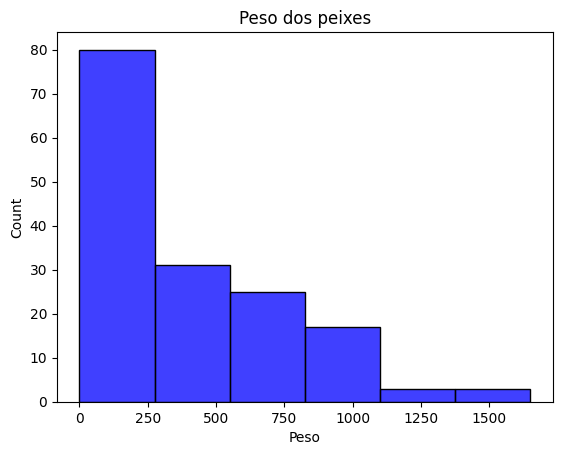

In [20]:
sns.histplot(peixes['Peso'], kde = False, bins =6, color = 'blue').set(title='Peso dos peixes')

Um outro plot que é bastante relacionado com o histograma é a plotagem de densidade. Esse gráfico é formado pelo cálculo de uma estimativa de uma distribuição continua de probabilidades que possa ter gerado os dados observados. Para isso podemos usar o `kdeplot` do `seaborn`

[Text(0.5, 1.0, 'Peso dos peixes')]

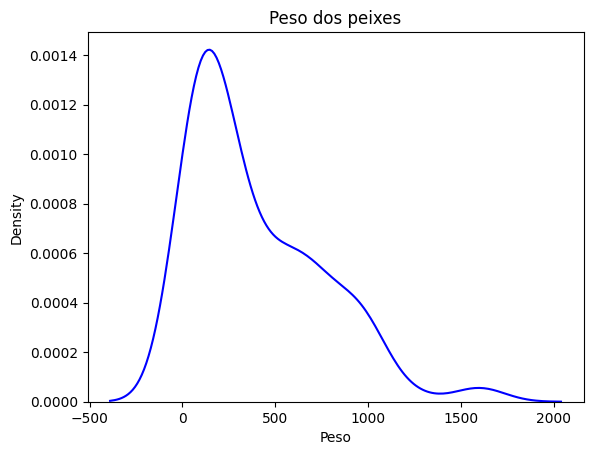

In [21]:
sns.kdeplot(peixes['Peso'], color = 'blue').set(title='Peso dos peixes')

Podemos ainda sobrepor tanto o histograma com o gráfico de densidade de probabilidade e obter um resultado final com ambos os gráficos. Para isso, basta inserir o parâmetro `kde` como `True`

[Text(0.5, 1.0, 'Peso dos peixes')]

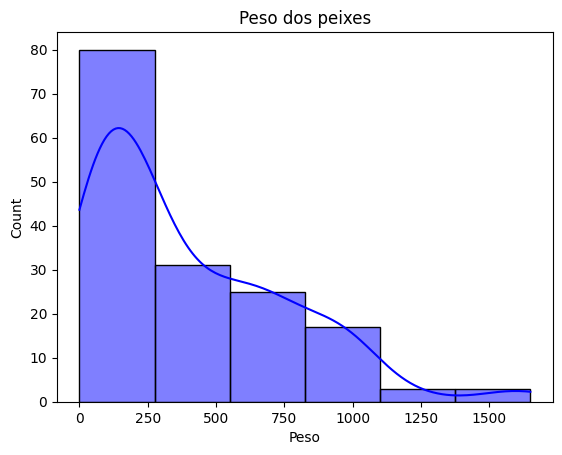

In [22]:
sns.histplot(peixes['Peso'], kde = True, bins =6, color = 'blue').set(title='Peso dos peixes')

[Text(0.5, 1.0, 'Peso dos peixes')]

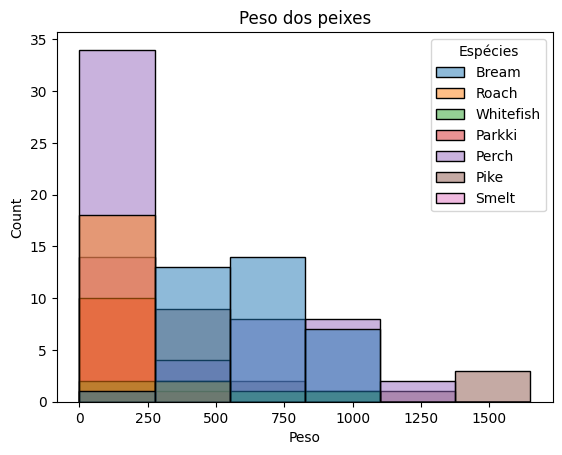

In [23]:
sns.histplot(peixes, x = 'Peso', kde = False, bins =6, color = 'blue', hue = 'Espécies').set(title='Peso dos peixes')

Podemos também adicionar filtros nos histogramas para fazermos análises baseado em algumas categorias, por exemplo vamos analisar a distribuição do peso dos peixes do tipo Bream:

[Text(0.5, 1.0, 'Peso dos peixes Bream')]

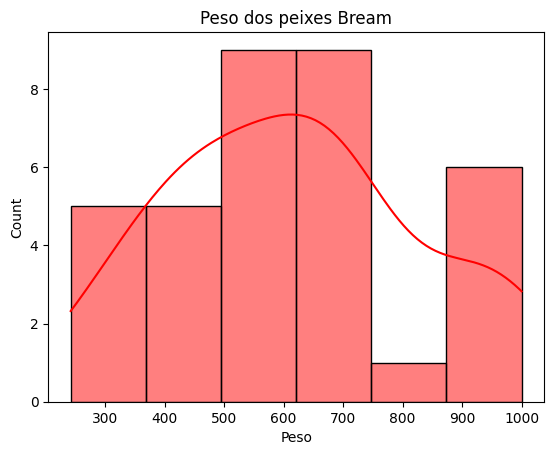

In [24]:
sns.histplot(peixes[peixes['Espécies']=="Bream"]['Peso'], kde = True, bins =6, color = 'red').set(title='Peso dos peixes Bream')

[Text(0.5, 1.0, 'Peso dos peixes Bream')]

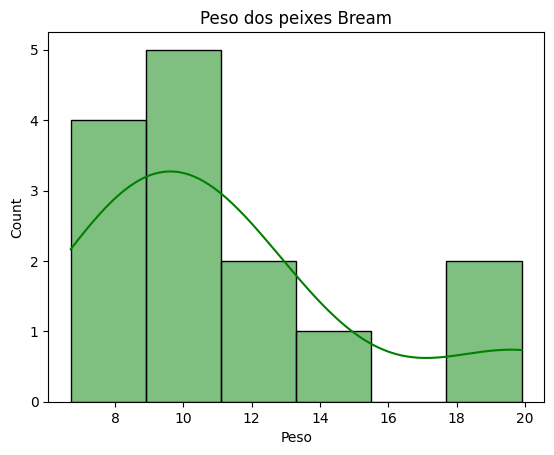

In [25]:
sns.histplot(peixes[peixes['Espécies']=="Smelt"]['Peso'], kde = True, bins =6, color = 'green').set(title='Peso dos peixes Bream')

## Gráficos de Dispersão

Dispersão é um gráfico onde temos duas variáveis (x e y) e queremos saber se existe alguma relação entre elas, isto é, se um depende da outra de alguma maneira, formando algum tipo de curva matemática que possamos descobrir ou utilizar para fazer predições.

Vamos iniciar com plots de gráficos de todos os tipos de peixes, comparando a sua altura e o seu peso:

[Text(0.5, 1.0, 'Distribuição do peso dos peixes')]

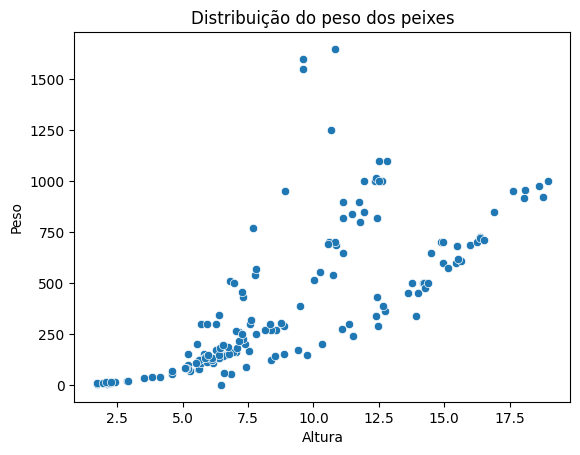

In [26]:
sns.scatterplot(data=peixes, x="Altura", y="Peso").set(title="Distribuição do peso dos peixes")

[Text(0.5, 1.0, 'Distribuição do peso dos peixes por tipo')]

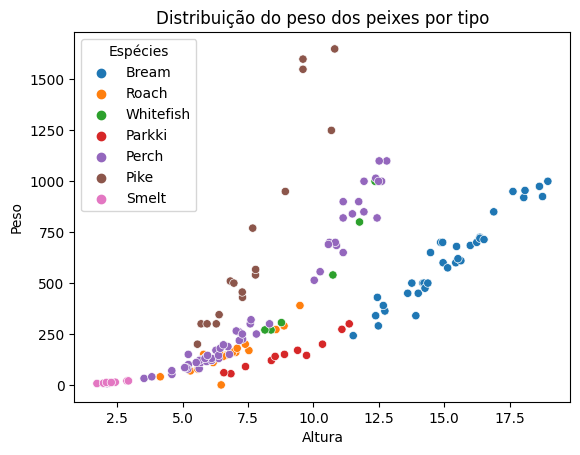

In [27]:
sns.scatterplot(data=peixes, x="Altura", y="Peso", hue = "Espécies").set(title="Distribuição do peso dos peixes por tipo")

Devemos em diversos cenários considerar que as cores não são o suficiente para a compreensão do gráfico. Para isso, podemos usar o parâmetro `style` que irá fazer com que o gráfico utilize um marcador diferente para cada um dos pontos que pertencem a diferentes categorias. Por exemplo, se passarmos a coluna de Espécies teremos um marcador diferente para cada ponto que é de cada peixe diferente:

<Axes: xlabel='Altura', ylabel='Peso'>

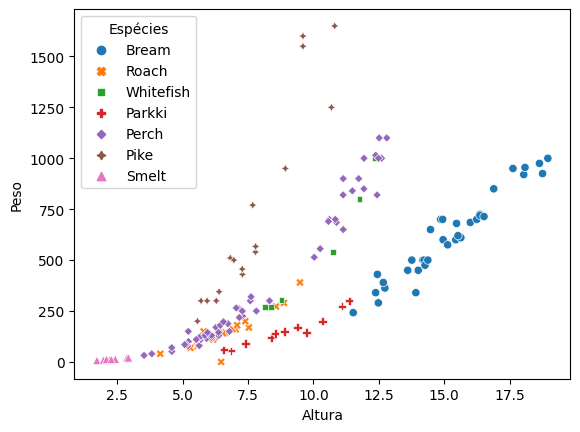

In [28]:
sns.scatterplot(data=peixes, x="Altura", y="Peso", hue = "Espécies", style="Espécies")

[Text(0.5, 1.0, 'Bream')]

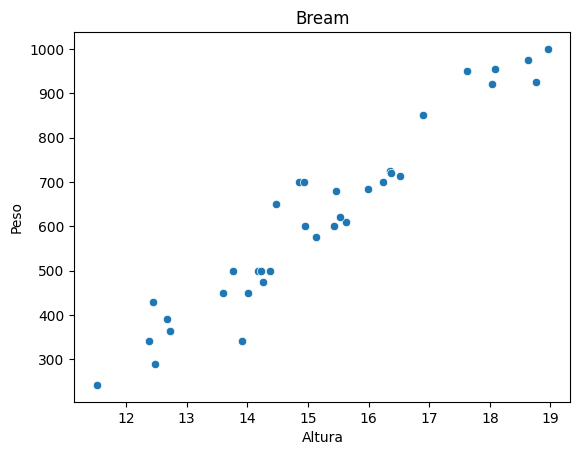

In [29]:
sns.scatterplot(data=peixes[peixes["Espécies"]=="Bream"], x="Altura", y="Peso").set(title="Bream")

[Text(0.5, 1.0, 'Roach')]

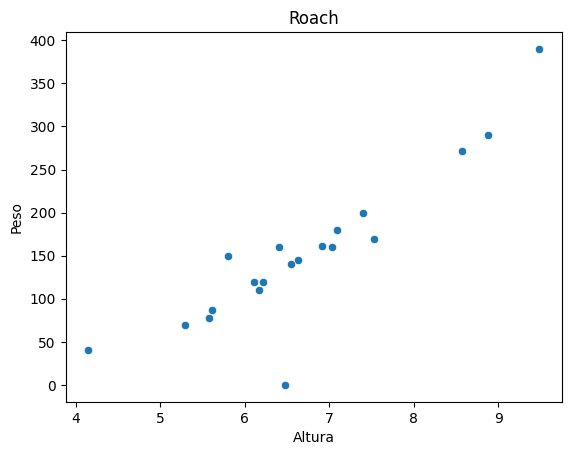

In [30]:
sns.scatterplot(data=peixes[peixes["Espécies"]=="Roach"], x="Altura", y="Peso").set(title="Roach")

[Text(0.5, 1.0, 'Perch')]

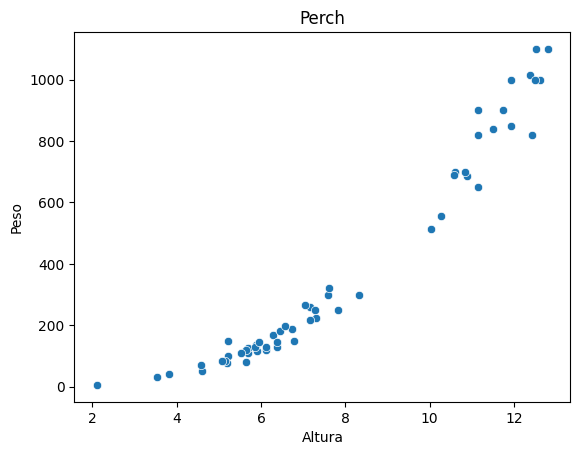

In [31]:
sns.scatterplot(data=peixes[peixes["Espécies"]=="Perch"], x="Altura", y="Peso").set(title="Perch")

**Existe alguma relação entre o peso e a altura dos peixes para o os peixes que fizemos os gráficos?**

**Existem espécies de peixes que se destacam pela sua altura e o seu peso em relação as outras espécies? Se sim, qual dos peixes possuem essas características?**

Como podemos ter diversos atributos, plotar individualmente cada gráfico em pares pode ser trabalhoso. Entretanto, podemos usar o `sns.pairplot()` para nos ajudar. O `pairplot` irá fazer um gráfico de dispersão comparando todas as variáveis possíveis.

Na sua diagonal principal podemos ver a densidade de probabilidade para cada um dos atributos. Nas outras posições temos os pares de plots de dispersão.

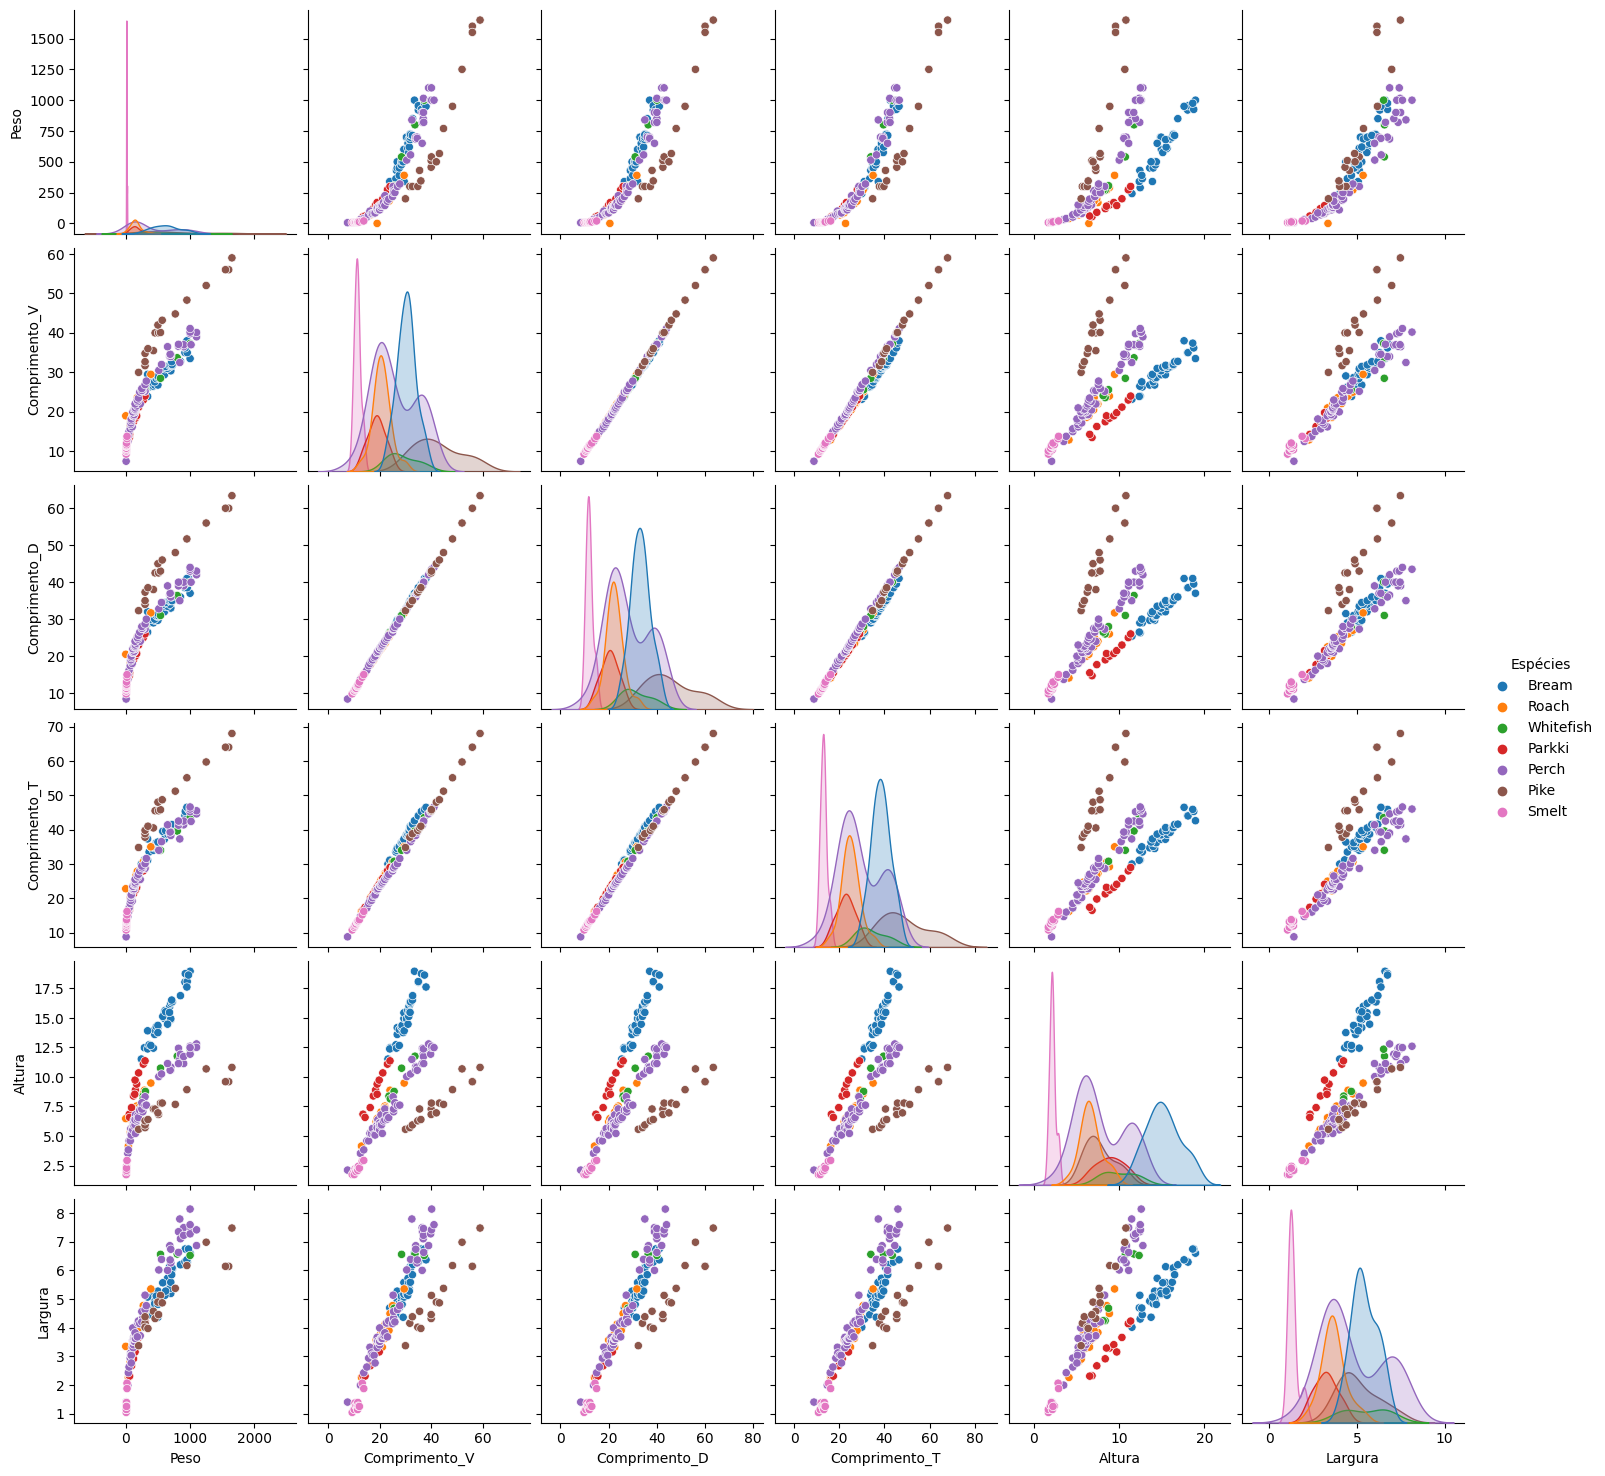

In [32]:
sns.pairplot(peixes, hue="Espécies")

## Gráficos de Barras e de Setores (pizza)

Podemos analisar os atributos categóricos usando gráficos de barras e graficos de setores (pizza) para comparar a frequência de ocorrência de cada categoria. Podemos usar o `sns.countplot(data=dados, x= 'coluna')` para fazer esses gráficos. Para isso, basta informar o DataFrame com os dados do seu projeto e a coluna categórica do seu DataFrame

<Axes: xlabel='Espécies', ylabel='count'>

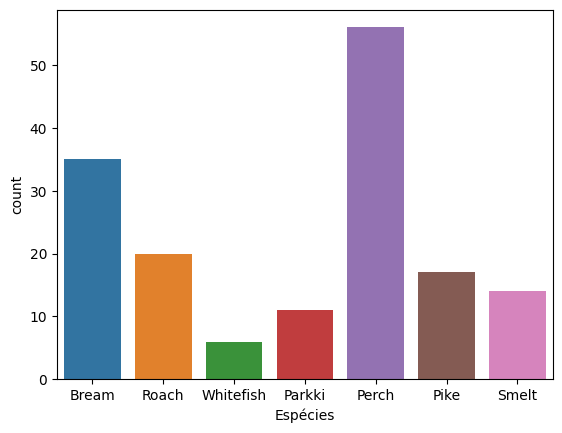

In [33]:
sns.countplot(data=peixes, x= 'Espécies')

Para explorar outras características do countplot precisamos ter mais colunas categóricas. Para isso iremos **criar uma nova coluna categórica** baseada no peso dos peixes. Isso será feito apenas para exemplificar o que podemos fazer com os dados categóricos

Faremos isso baseado nos histogramas que vimos anteriormente. Peixes com até 550g serão considerados peixes leves, peixes com mais de 550g e menos de 825g serão considerados peixes de peso médio e acima de 825g peixes pesados

In [34]:
peixes.loc[peixes['Peso'] <= 550 ,'categoria_peso'] = "Leve"
peixes.loc[(peixes['Peso'] > 550) & (peixes['Peso'] <= 825),'categoria_peso'] = "médio"
peixes.loc[peixes['Peso'] >= 825 ,'categoria_peso'] = "pesados"

In [35]:
peixes.isnull().sum()

Espécies          0
Peso              0
Comprimento_V     0
Comprimento_D     0
Comprimento_T     0
Altura            0
Largura           0
categoria_peso    0
dtype: int64

<Axes: xlabel='categoria_peso', ylabel='count'>

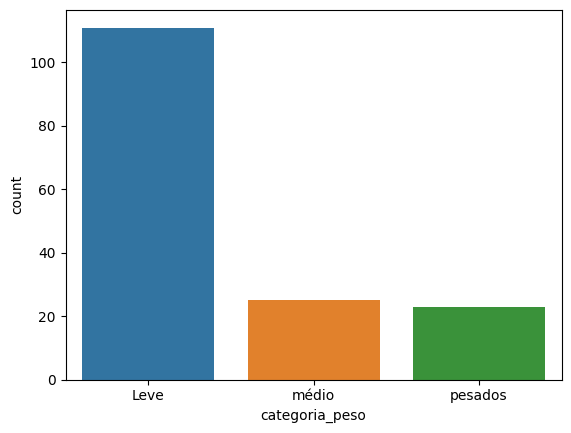

In [36]:
sns.countplot(data=peixes, x= 'categoria_peso')

Agora iremos criar um gráfico de barras onde iremos criar um subgrupo em cada categoria. Esse subgrupo será feito usando a coluna categoria_peso. Para isso, incluiremos o parâmetro `hue = "categoria_peso`.

<Axes: xlabel='Espécies', ylabel='count'>

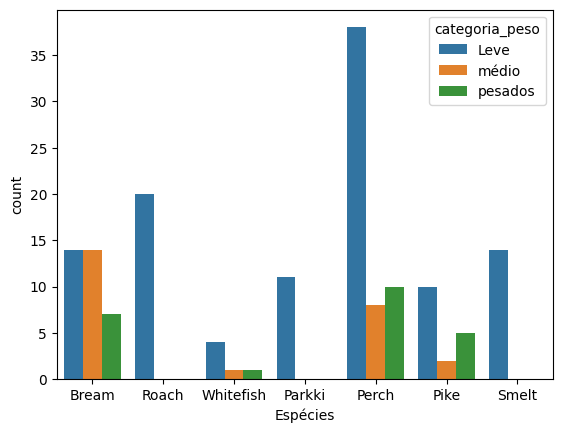

In [37]:
sns.countplot(data=peixes, x="Espécies", hue="categoria_peso")

**É possível concluir algo a partir desse gráfico?**

In [38]:
tipo_peixes = peixes['Espécies'].value_counts()
tipo_peixes

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Espécies, dtype: int64

<Axes: ylabel='Espécies'>

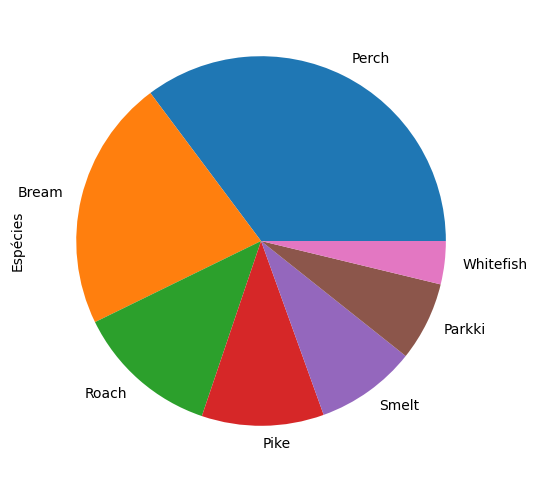

In [39]:
tipo_peixes.plot.pie(legend=False, figsize=(11, 6))

<Axes: ylabel='Espécies'>

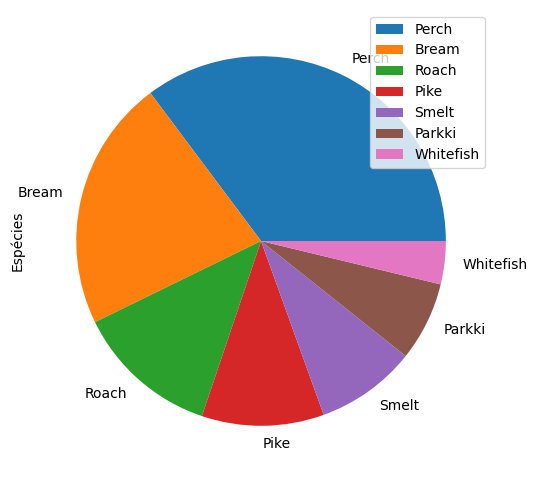

In [40]:
tipo_peixes.plot.pie(legend=True, figsize=(11, 6))

 ## Criando vários plots em uma imagem

Em alguns cenários podemos criar vários gráficos em uma única imagem para compararmos os diferentes resultados e permite a comparação entre eles.

Para isso, iniciamos o nosso código inserindo o seguinte comando:

`fig, axes = plt.subplots(qtde_linhas, qtde_colunas, figsize=(15, 15))`

Onde cada parâmetro pode ser interpretado como:



*   `fig`: Figura que iremos criar
*   `axes`: Podemos definir propriedades dos eixos que iremos criar
*   `qtde_linhas`: Quantas linhas de gráficos serão criadas
*   `qtde_colunas`: Quantas colunas de gráficos serão criadas
*   `figsize=(15, 15)`: Definimos o tamanho da nossa imagem, podemos alterar os valores dentro do parenteses para alterar o tamanho da imagem.



[Text(0.5, 1.0, 'Peso dos peixes')]

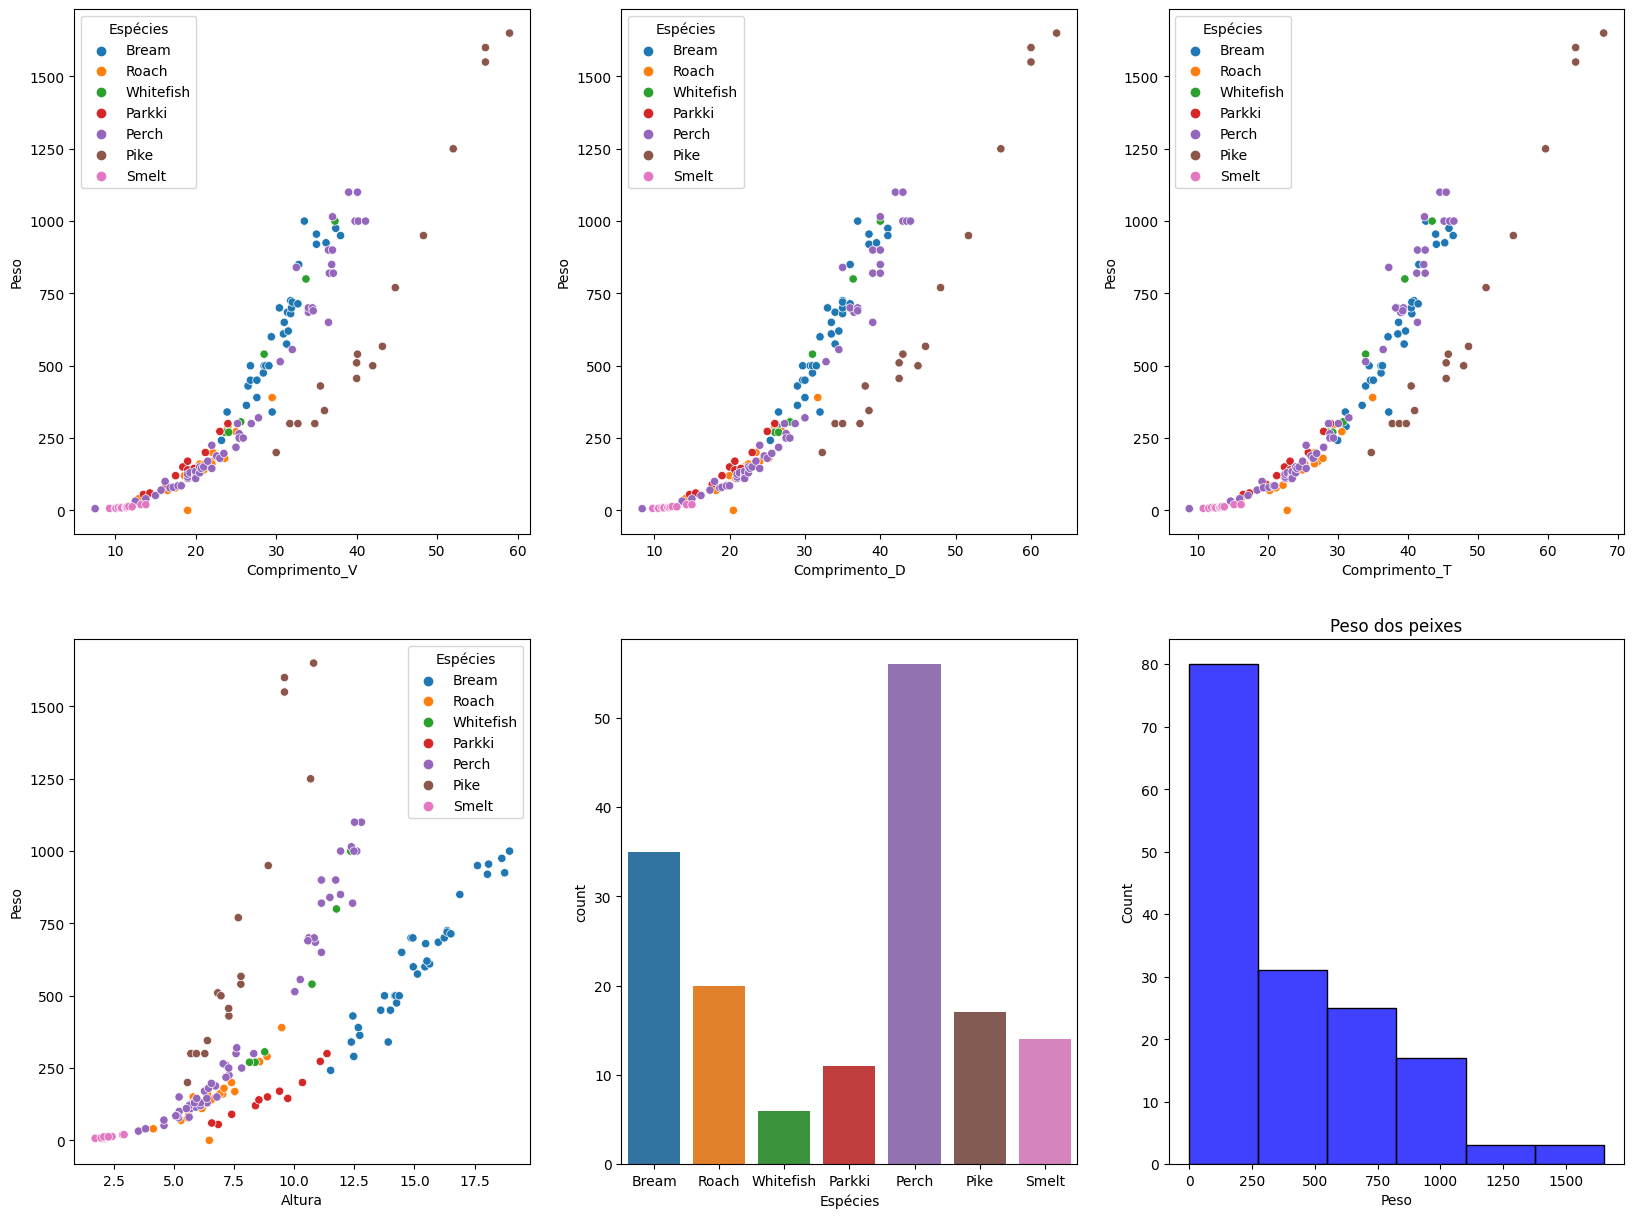

In [41]:
#Definindo a região do plot do gráfico (2 linhas, 3 colunas)
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

sns.scatterplot(data=peixes, x="Comprimento_V", y="Peso", hue = "Espécies",  ax=axes[0,0])
sns.scatterplot(data=peixes, x="Comprimento_D", y="Peso", hue = "Espécies",  ax=axes[0,1])
sns.scatterplot(data=peixes, x="Comprimento_T", y="Peso", hue = "Espécies",  ax=axes[0,2])
sns.scatterplot(data=peixes, x="Altura", y="Peso", hue = "Espécies",  ax=axes[1,0])
sns.countplot(data=peixes, x= 'Espécies', ax = axes[1,1])
sns.histplot(peixes['Peso'], kde = False, bins =6, color = 'blue', ax=axes[1,2]).set(title='Peso dos peixes')

Podemos usar esse recurso de subplots para obter todas as distribuições dos pesos dos peixes baseados em seus pesos:

[Text(0.5, 1.0, 'Smelt')]

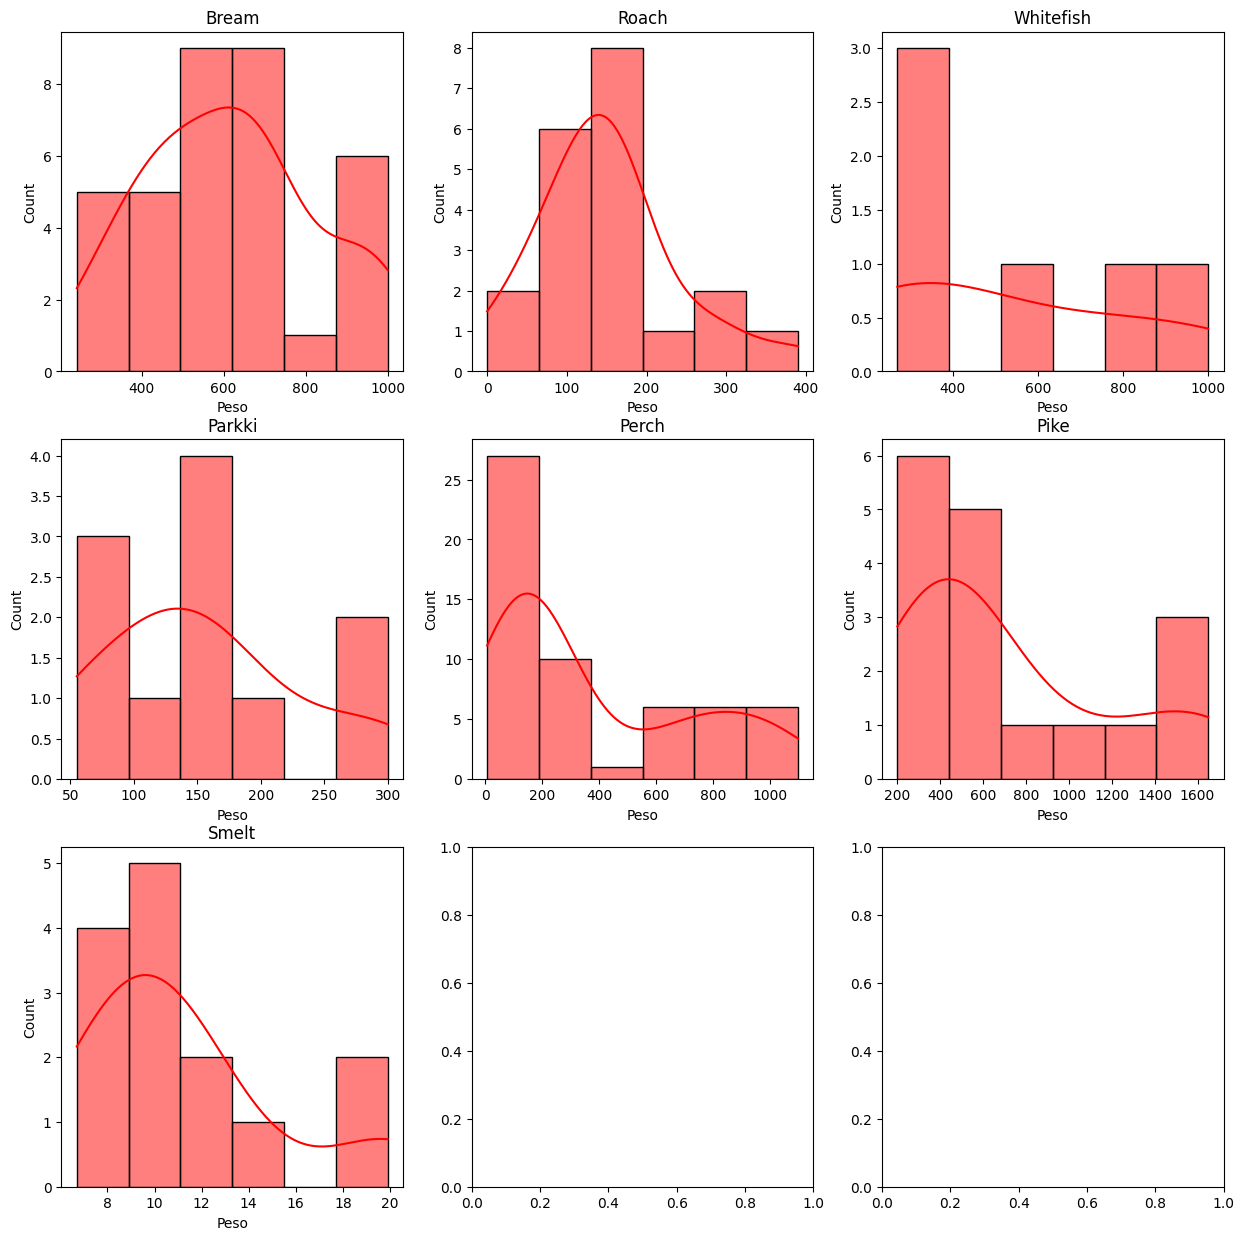

In [42]:
#Definindo a região do plot do gráfico (2 linhas, 2 colunas)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(peixes[peixes['Espécies']=="Bream"]['Peso'], kde = True, bins =6, color = 'red', ax=axes[0,0]).set(title='Bream')
sns.histplot(peixes[peixes['Espécies']=="Roach"]['Peso'], kde = True, bins =6, color = 'red', ax=axes[0,1]).set(title='Roach')
sns.histplot(peixes[peixes['Espécies']=="Whitefish"]['Peso'], kde = True, bins =6, color = 'red', ax=axes[0,2]).set(title='Whitefish')
sns.histplot(peixes[peixes['Espécies']=="Parkki"]['Peso'], kde = True, bins =6, color = 'red', ax=axes[1,0]).set(title='Parkki')
sns.histplot(peixes[peixes['Espécies']=="Perch"]['Peso'], kde = True, bins =6, color = 'red', ax=axes[1,1]).set(title='Perch')
sns.histplot(peixes[peixes['Espécies']=="Pike"]['Peso'], kde = True, bins =6, color = 'red', ax=axes[1,2]).set(title='Pike')
sns.histplot(peixes[peixes['Espécies']=="Smelt"]['Peso'], kde = True, bins =6, color = 'red', ax=axes[2,0]).set(title='Smelt')



Ou até mesmo para comparar a dispersão dos dados lado a lado:

[Text(0.5, 1.0, 'Roach')]

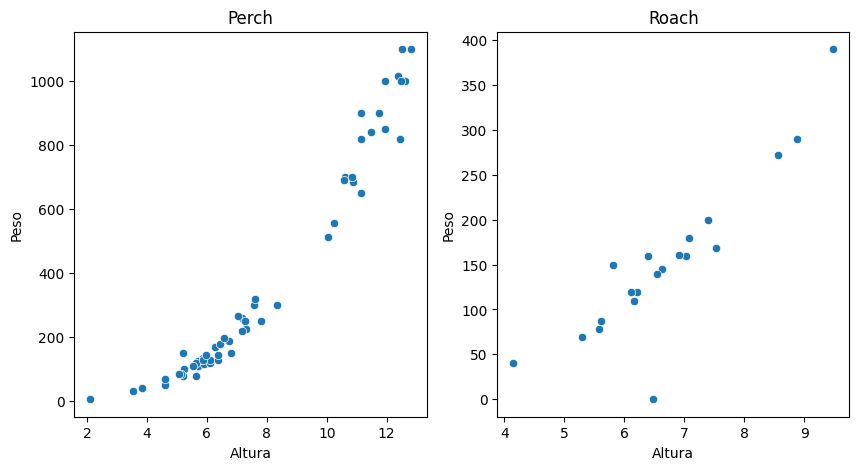

In [43]:
#Definindo a região do plot do gráfico (2 linhas, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=peixes[peixes["Espécies"]=="Perch"], x="Altura", y="Peso", ax=axes[0]).set(title = "Perch")
sns.scatterplot(data=peixes[peixes["Espécies"]=="Roach"], x="Altura", y="Peso", ax=axes[1]).set(title = "Roach")